# Part I - Ford GoBike System Data Exploration
## by (Maicy Maritim)

## Introduction
Ford GoBike is a bike share used in the San Fransisco Bay Area, it contains multiple specially designed and durable bikes that can be used with no time limits. It is designed to enhance sustainable transportation in the Bay Area.

Ford GoBike is designed for the hilly landscape of San Franciscoand are therefore built specially to be comfortable and easy to ride.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#Load the data into a dataset
df = pd.read_csv('fordgobike.csv')

In [3]:
#Show the first 10 rows
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
#display a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


#### Issues observed:
Datatypes of the following columns need to be converted to the corresponding datatypes

1. duration_sec = int
2. start_time and end_time = datetime
3. start_station_id and end_station_id = int
4. member_birth_year = int


In [5]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

#### Issues observed:

The following columns contain null values:

1. start_station_id
2. start_station_name
3. end_station_id
4. end_station_name 
5. member_birth_year
6. member_gender

In [6]:
#Search for duplicates
df.duplicated().sum()

0

There are no duplicates in this data frame.

### Cleaning

The issues identified above should first be cleaned before exploring the data.
The issues:
1. Wrong data types, and
2. Missing data

In [7]:
#Copy the original df to a new one
df_clean = df.copy()

#### Define

Convert the following columns into the appropriate datatypes

1. duration_sec = int -  and remove the decimals
2. start_time and end_time = datetime
3. bike_id, start_station_id and end_station_id = string (object)
4. member_birth_year = int
5. user_type, member_gender, and bike_share_for_all_trip = category

#### Code

In [8]:
#Change to datetime
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [9]:
#Change to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df.start_station_id.astype(str)
df_clean.end_station_id = df.end_station_id.astype(str)

In [10]:
#Remove the decimals
df_clean.bike_id = df_clean.bike_id.str.split('.').str[0]
df_clean.start_station_id = df_clean.start_station_id.str.split('.').str[0]
df_clean.end_station_id = df_clean.end_station_id.str.split('.').str[0]

In [11]:
#Drop rows containing NaN in the member_birth_year column
null_year = df[df['member_birth_year'].isna() == True].index
df_clean.drop(null_year, inplace=True)

#Change to int
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

#### Test

In [12]:
#Check if the they converted to datetime
df_clean[['start_time', 'end_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 2 columns):
start_time    175147 non-null datetime64[ns]
end_time      175147 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 4.0 MB


The columns start_time and end_time are now converted to datetime

In [13]:
#Check if converted to object
df_clean[['bike_id', 'start_station_id', 'end_station_id']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 3 columns):
bike_id             175147 non-null object
start_station_id    175147 non-null object
end_station_id      175147 non-null object
dtypes: object(3)
memory usage: 5.3+ MB


The columns bike_id, start_station_id, end_station_id are now strings

In [14]:
#Check if converted to integer
df_clean[['member_birth_year']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 1 columns):
member_birth_year    175147 non-null int64
dtypes: int64(1)
memory usage: 2.7 MB


The column member_birth_year has been converted to integer

In [15]:
#Check if the decimals have been removed
df_clean[['bike_id', 'start_station_id', 'end_station_id']].head(10)

,bike_id,start_station_id,end_station_id
0,4902,21,13
2,5905,86,3
3,6638,375,70
4,4898,7,222
5,5200,93,323
6,3803,300,312
7,6329,10,127
8,6548,10,127
9,6488,19,121
10,5318,370,43


The columns bike_id, start_station_id, end_station_id no longer contain decimals

#### Define
Obtain the age of each member by subtracting their birth year from the current year (2019).
Also remove users with invalid ages e.g 140

#### Code

In [16]:
#Get the members age
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

In [17]:
#Keep users with age of 100 and below
df_clean = df_clean.query("member_age <= 100")

#### Test

In [18]:
df_clean[['member_age']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175075 entries, 0 to 183411
Data columns (total 1 columns):
member_age    175075 non-null int64
dtypes: int64(1)
memory usage: 2.7 MB


In [19]:
df_clean.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60


A column 'member_age' has been added to the dataframe containing the ages of the members

#### Define
Convert the columns user_type, member_gender, and bike_share_for_all_trip to category format

#### Code

In [20]:
#Convert to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

#### Test

In [21]:
df_clean[['user_type', 'member_gender', 'bike_share_for_all_trip']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175075 entries, 0 to 183411
Data columns (total 3 columns):
user_type                  175075 non-null category
member_gender              175075 non-null category
bike_share_for_all_trip    175075 non-null category
dtypes: category(3)
memory usage: 1.8 MB


The user_type, member_gender, and bike_share_for_all_trip have been converted to category format

#### Define 
Add columns; day and hour, and duration in minutes.
The data collected are all for the month of February 2019.

#### Code

In [22]:
# Start Day
df_clean['start_day'] = df_clean['start_time'].dt.strftime('%a')

In [23]:
# Start and end time hour
df_clean['start_hour'] = df_clean['start_time'].dt.hour
df_clean['end_hour'] = df_clean['end_time'].dt.hour

In [24]:
#Duration in minutes
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

#### Test

In [25]:
df_clean.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_day,start_hour,end_hour,duration_min
27457,759,2019-02-25 09:32:40.739,2019-02-25 09:45:20.135,268,Ellsworth St at Russell St,37.857490,-122.261578,154,Doyle St at 59th St,37.841924,...,6025,Subscriber,1985,Male,No,34,Mon,9,9,12
71,303,2019-02-28 23:24:07.711,2019-02-28 23:29:11.619,182,19th Street BART Station,37.809013,-122.268247,197,El Embarcadero at Grand Ave,37.808848,...,5883,Subscriber,1988,Male,No,31,Thu,23,23,5
119818,224,2019-02-11 17:38:06.371,2019-02-11 17:41:50.726,116,Mississippi St at 17th St,37.764802,-122.394771,114,Rhode Island St at 17th St,37.764478,...,4553,Subscriber,1989,Female,Yes,30,Mon,17,17,3
95758,545,2019-02-15 12:39:37.241,2019-02-15 12:48:43.144,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,5280,Subscriber,1979,Male,No,40,Fri,12,12,9
28906,503,2019-02-25 08:12:44.004,2019-02-25 08:21:07.202,25,Howard St at 2nd St,37.787522,-122.397405,64,5th St at Brannan St,37.776754,...,6120,Subscriber,1981,Male,No,38,Mon,8,8,8
177493,175,2019-02-01 21:19:08.119,2019-02-01 21:22:03.263,247,Fulton St at Bancroft Way,37.867789,-122.265896,244,Shattuck Ave at Hearst Ave,37.873676,...,5180,Subscriber,1999,Male,No,20,Fri,21,21,2
30670,1122,2019-02-24 18:39:15.765,2019-02-24 18:57:57.873,28,The Embarcadero at Bryant St,37.787168,-122.388098,93,4th St at Mission Bay Blvd S,37.770407,...,4377,Subscriber,1992,Female,No,27,Sun,18,18,18
1709,397,2019-02-28 18:48:33.911,2019-02-28 18:55:10.943,80,Townsend St at 5th St,37.775235,-122.397437,350,8th St at Brannan St,37.771431,...,263,Subscriber,1982,Male,No,37,Thu,18,18,6
1542,248,2019-02-28 19:02:50.715,2019-02-28 19:06:59.342,340,Harmon St at Adeline St,37.849735,-122.270582,242,Milvia St at Derby St,37.860125,...,5638,Subscriber,1992,Male,No,27,Thu,19,19,4
61559,274,2019-02-20 17:40:45.994,2019-02-20 17:45:20.127,79,7th St at Brannan St,37.773492,-122.403673,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,...,5467,Subscriber,1984,Female,No,35,Wed,17,17,4


#### Define
Get the total distance traveled using the longitudes and latitudes

#### Code

In [26]:
from math import radians, sin, cos, acos

def dist(orgn, dest):

    lat1, long1 = orgn
    lat2, long2 = dest
    rad = 6371
    #convert to US units of miles after

    dist_lat = math.radians(lat2 - lat1)
    dist_long = math.radians(long2 - long1)
    
    x = (math.sin(dist_lat / 2) * math.sin(dist_lat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dist_long / 2) * math.sin(dist_long / 2))
    y = 2 * math.atan2(math.sqrt(x), math.sqrt(1 - x))
    z = rad * y

    return z

In [27]:
df_clean['distance_km'] = df_clean.apply(lambda a: dist((a['start_station_latitude'], a['start_station_longitude']), (a['end_station_latitude'], a['end_station_longitude'])), axis=1)

In [28]:
# Convert KM to Miles
df_clean['distance_miles'] = df_clean['distance_km'] * 0.621371

#### Test

In [29]:
df_clean.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_day,start_hour,end_hour,duration_min,distance_km,distance_miles
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,1984,Male,No,35,Thu,17,8,869,0.544709,0.338466
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,47,Thu,12,5,1030,2.704545,1.680526
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,1989,Other,No,30,Thu,17,4,608,0.260739,0.162015
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,45,Thu,23,0,26,2.409301,1.497070
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,1959,Male,No,60,Thu,23,0,29,3.332203,2.070534
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.317298,-121.884995,312,San Jose Diridon Station,37.329732,...,1983,Female,No,36,Thu,23,0,19,2.028551,1.260483
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,...,1989,Male,No,30,Thu,23,0,26,4.532568,2.816406
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,...,1988,Other,No,31,Thu,23,0,26,4.532568,2.816406
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19,Post St at Kearny St,37.788975,-122.403452,121,Mission Playground,37.759210,...,1992,Male,No,27,Thu,23,0,17,3.664101,2.276766
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370,Jones St at Post St,37.787327,-122.413278,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,1996,Female,Yes,23,Thu,23,0,7,0.979824,0.608834


Save the cleaned dataframe into a new csv file named 'fordgo_master.csv'

In [30]:
df_clean.to_csv('fordgo_master.csv', index=False)

In [31]:
df_clean.shape

(175075, 23)

### What is the structure of your dataset?

> This dataset contains 175147 observations(rows). Each observation has 23 attributes (columns).
  The columns include:
1. duration_sec
2. start_time
3. end_time
4. start_station_id
5. start_station_name
6. start_station_latitude
7. start_station_longitude
8. end_station_id
9. end_station_name
10. end_station_latitude
11. end_station_longitude
12. bike_id
13. user_type
14. member_birth_year
15. member_gender
16. bike_share_for_all_trip
17. member_age
18. start_Day
19. start_hour
20. end_hour
21. duration_min
22. distance_km
23. distance_miles

### What is/are the main feature(s) of interest in your dataset?

> All the data related to the starting and ending of a ride by a member. There is also data attributed to the users; age, gender and their membership type.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> All time-based information

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.
 


In [32]:
#Load the master csv file into a dataframe
master_df = pd.read_csv('fordgo_master.csv')

In [33]:
#Remove the rainbow colors and use one color
base_color = sb.color_palette()[0]

In [34]:
#Create a function that plots histograms
def histogram(a, b, c, d):
    plt.figure(figsize=(10,5))
    plt.hist(data = master_df, x=master_df[a], color=base_color, bins=np.arange(b, c, d), rwidth = 0.8)
    plt.title('{a}'.format(a=a.upper()), fontsize=16)
    plt.xlabel(a, fontsize=13)
    plt.ylabel("Total Count", fontsize=13)
    
plt.show()

In [35]:
gender = ['Male', 'Female', 'Other']
master_df['start_day'] = pd.Categorical(master_df['start_day'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);
master_df['member_gender'] = pd.Categorical(master_df['member_gender'], categories= gender, ordered=True);

In [36]:
#Function to plot countplots in univariate exploration
def countUni(a):
    plt.figure(figsize=(10,5))
    sb.countplot(data=master_df, x=master_df[a], color=base_color)
    plt.title('{a}'.format(a=a.upper()), fontsize=16)
    plt.xlabel(a, fontsize=13)
    plt.ylabel("Count", fontsize=13)

    
plt.show()

#### Question1: Number of bike trips per day?


In [37]:
master_df.start_day.describe()

count     175075
unique         7
top          Thu
freq       33726
Name: start_day, dtype: object

In [38]:
master_df.start_day.value_counts()

Thu    33726
Tue    30601
Wed    28445
Fri    27665
Mon    25675
Sun    14524
Sat    14439
Name: start_day, dtype: int64

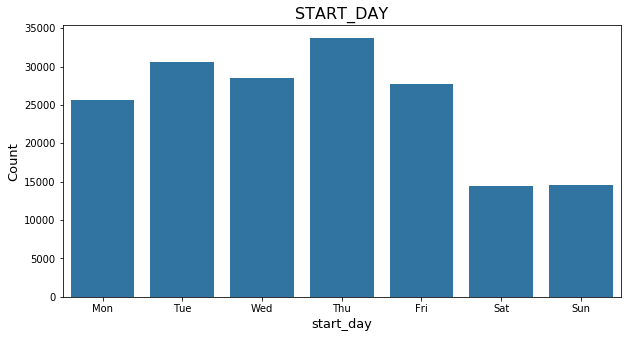

In [39]:
#Number of Bike trips per day
countUni('start_day')

#### Observation: 
The bike sharing system is mainly used on the weekdays, with Thursday having the highest number of trips. There is a huge drop in the number of trips on the weekends. This suggests that the bike share system is primarily used for the purpose of commuting to and from work.

#### Question 2: What time is the bike share system mostly used?

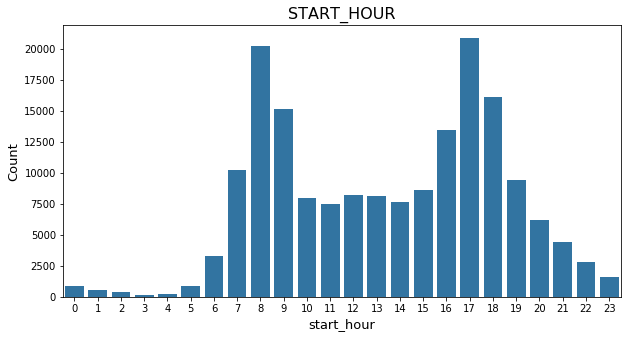

In [40]:
#Number of trips in every hour of the day
countUni('start_hour')

#### Observation: 
The bike share system is mostly used at 8am to 9am and 6pm to 7pm(1800 - 1900 hours). These are the times when people head to the workplace and leave the workplace.

#### Question 3: Trip Duration?

In [41]:
master_df.duration_min.describe()

count    175075.000000
mean         11.245295
std          27.366512
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

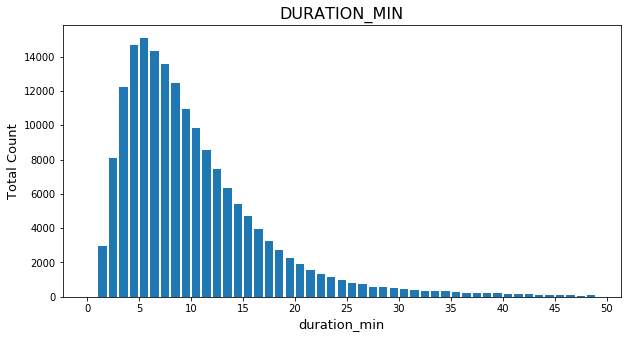

In [42]:
#Trip duration
histogram('duration_min', 0, 50, 1)
ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);

#### Observation: 
- The average duration of a trip is about 11.24 minutes.
- 75% of the trips are 13 minutes and below.
- Most rides are between 3 and 11 minutes.
- This indicates that most users are using the bike share system for short distances.

#### Question 4: Trip Distance in Kilometres

In [43]:
master_df.distance_km.describe()

count    175075.000000
mean          1.689171
std           1.096653
min           0.000000
25%           0.907700
50%           1.429329
75%           2.222069
max          69.469241
Name: distance_km, dtype: float64

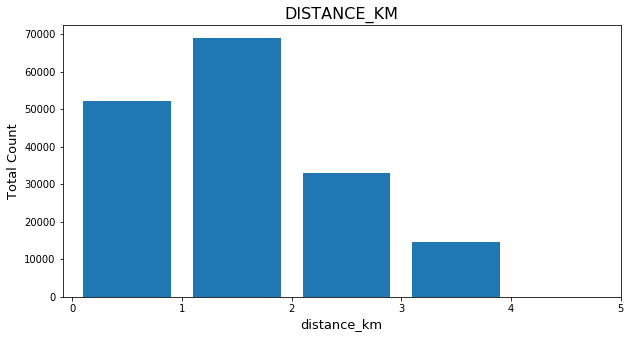

In [44]:
#Trip distance in km

histogram('distance_km', 0, 5, 1)
ticks = [0, 1, 2, 3, 4, 5]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);

#### Observation:
- The average distance covered per trip is about 1.7 kilometres.
- 75% of the bike rides are 2.2km and less.
- Most rides are between 1 and 2 Kms

#### Question 5: Bike usage by gender

In [45]:
#Total counts for each gender
gender = master_df.member_gender.value_counts()
gender

Male      130594
Female     40830
Other       3651
Name: member_gender, dtype: int64

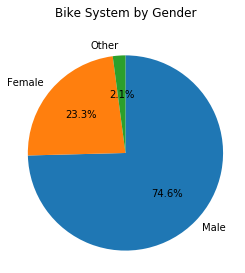

In [46]:
plt.pie(gender, labels = gender.index, startangle = 90, counterclock = False, autopct= '%1.1f%%', textprops={'color':'black'});
plt.axis('square');
plt.title('Bike System by Gender', y=1.1);

#### Observation:
Majority of the Ford GoBike System users are Male(74.6%), followed by Female(23.3%) and finally others(2.1%)

#### Question 6: Age of the members of Ford GoBike System

In [47]:
df_clean.member_age.describe()

count    175075.000000
mean         34.158778
std           9.972079
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          99.000000
Name: member_age, dtype: float64

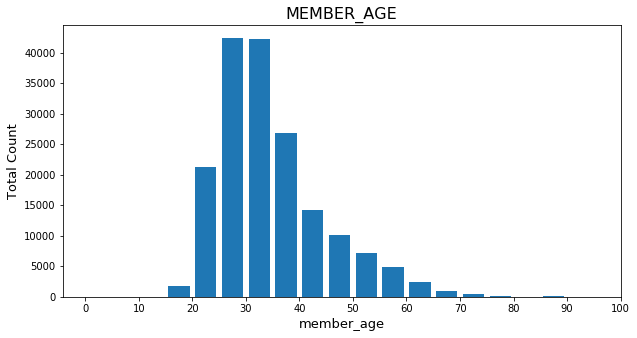

In [48]:
#plot

histogram('member_age', 0, 100, 5)
tick1 = [0, 10, 20, 30, 40 , 50, 60, 70, 80, 90, 100]
labels1 = ['{}'.format(v) for v in tick1]
plt.xticks(tick1, labels1);

#### Observation:
- The mean age of a user is about 34 years.
- 75% of users are 39 years old and below.
- Majority of the users are between 25-35 years old.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The dataset was thoroughly cleaned during the cleaning phase, therefore there were no issues or unusual points.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>  There were outliers in the ages of the users (more than 100), that I dropped for a cleaner visualization.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [49]:
master_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'member_age', 'start_day', 'start_hour', 'end_hour', 'duration_min',
       'distance_km', 'distance_miles'],
      dtype='object')

In [50]:
master_df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_day,start_hour,end_hour,duration_min,distance_km,distance_miles
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984,Male,No,35,Thu,17,8,869,0.544709,0.338466
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,47,Thu,12,5,1030,2.704545,1.680526


#### Question 1: User type usage by days of the week

In [51]:
master_df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

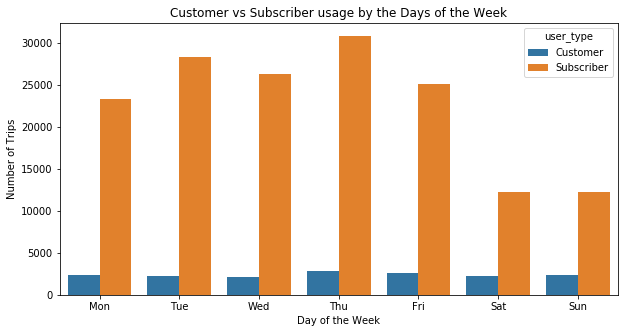

In [53]:
#User type usage by Days of the Week
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize = (10, 5))
sb.countplot(data=master_df, x='start_day', hue='user_type', order=days);
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.title("Customer vs Subscriber usage by the Days of the Week");

#### Observation:
Subscribers are the most frequent users of the Ford GoBike System on each day of the week.

#### Question 2: What is the average distance covered by each user type?

In [54]:
master_df.groupby('user_type')['distance_km'].mean()

user_type
Customer      1.894633
Subscriber    1.667611
Name: distance_km, dtype: float64

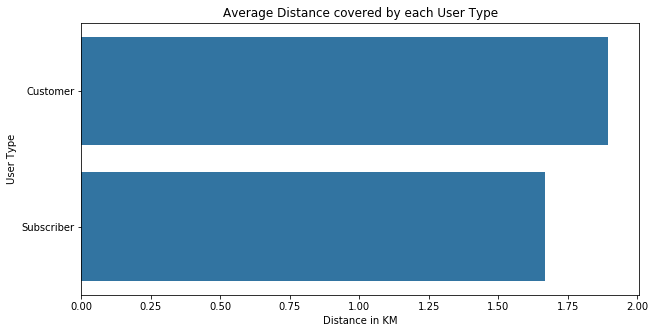

In [60]:
plt.figure(figsize = (10, 5))
sb.barplot(data=master_df, x='distance_km', y='user_type', color=base_color, errwidth = 0);
plt.xlabel('Distance in KM')
plt.ylabel('User Type')
plt.title('Average Distance covered by each User Type');

#### Observation:

Customers had a slightly higher average distance covered compared to Subscribers. This suggests that customers mostly use bike share system for long distances, whereas Subscribers use it for shorter distances.

#### Question 3: What is the average time taken by each user type?

In [61]:
#Mean of time taken in minutes for each user type
user_time = master_df.query("duration_min <= 30")

In [62]:
user_time.groupby('user_type')['duration_min'].describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
Customer,14818.0,12.618100,6.756737,1.0,7.0,11.0,17.0,30.0
Subscriber,154675.0,8.748951,5.482909,1.0,5.0,8.0,12.0,30.0


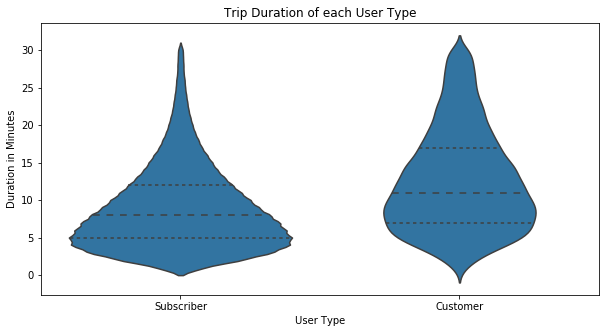

In [63]:
plt.figure(figsize = (10, 5))
sb.violinplot(data = user_time, x='user_type', y='duration_min', color=base_color, inner='quartile');
plt.xlabel('User Type')
plt.ylabel('Duration in Minutes')
plt.title('Trip Duration of each User Type');

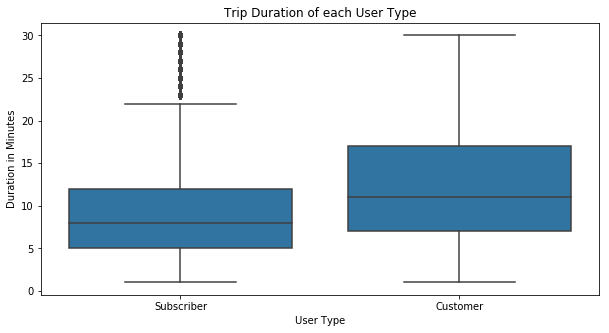

In [65]:
plt.figure(figsize = (10, 5))
sb.boxplot(data = user_time, x='user_type', y='duration_min', color=base_color);
plt.xlabel('User Type')
plt.ylabel('Duration in Minutes')
plt.title('Trip Duration of each User Type');

#### Observation:
Customers typically have longer durations ranging from 7-17 minutes and Subscribers durations ranging from 5-12 minutes. 

#### Question 4: Distance covered by each gender (Male vs Female)

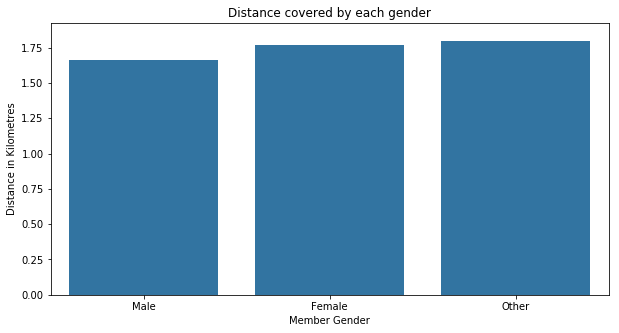

In [67]:
gender = ['Male', 'Female', 'Other']
plt.figure(figsize = (10, 5))
sb.barplot(data=master_df, x='member_gender', y='distance_km', color = base_color, order = gender, errwidth = 0);
plt.xlabel('Member Gender')
plt.ylabel('Distance in Kilometres')
plt.title('Distance covered by each gender');

#### Observation:
Females cover more distance than the Male users of Ford GoBike System.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Comparing other variables such as time taken and distance covered to the values of the user type variable (Customer vs. Subscriber) has helped to understand and draw various insights in the dataset. From what I have observed, Customers mainly use the bike share system on the weekends whereas Subscribers mostly use it on the weekdays for the purpose of commuting to and from work.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There are slightly more female users of the bike share system than male users.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Question 1: Daily number of trips per subscribers by age group

In [68]:
master_df.member_age.describe()

count    175075.000000
mean         34.158778
std           9.972079
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          99.000000
Name: member_age, dtype: float64

In [69]:
master_df['age_group'] = master_df['member_age'].apply(lambda x: '18 - 27' if 18<=x<=27
                                                 else '28 - 37' if 28<=x<=37
                                                 else '38 - 47' if 38<=x<=47
                                                 else '48 - 57' if 48<=x<=57
                                                 else '58 - 67' if 58<=x<=67
                                                 else '68 - 99' if 68<=x<=99
                                                      else x)

master_df.age_group.value_counts()

28 - 37    76889
18 - 27    48227
38 - 47    30247
48 - 57    14002
58 - 67     4750
68 - 99      960
Name: age_group, dtype: int64

In [70]:
age_grp = master_df.query("user_type == 'Subscriber'").groupby(['start_day', 'age_group']).agg({'bike_id':'count'}).reset_index()


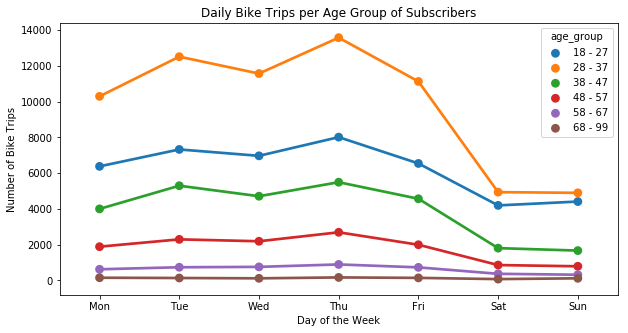

In [72]:
plt.figure(figsize = (10, 5))
ax = sb.pointplot(data=age_grp, x='start_day', y='bike_id', hue='age_group');
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bike Trips')
plt.title('Daily Bike Trips per Age Group of Subscribers');

#### Observation:
- Subscribers within the age group 28-37 are the most frequent user of the bike share system.
- Subscribers within the age group 68 - 99 are the least frequent users.
- Thursday has the highest number of users in each age group
- On the weekends, the number of bike rides drop significantly for most age groups except 68 - 99, which remains the same throughout the week

#### Question 2: What day and time is the bike share system mostly used by each user type?

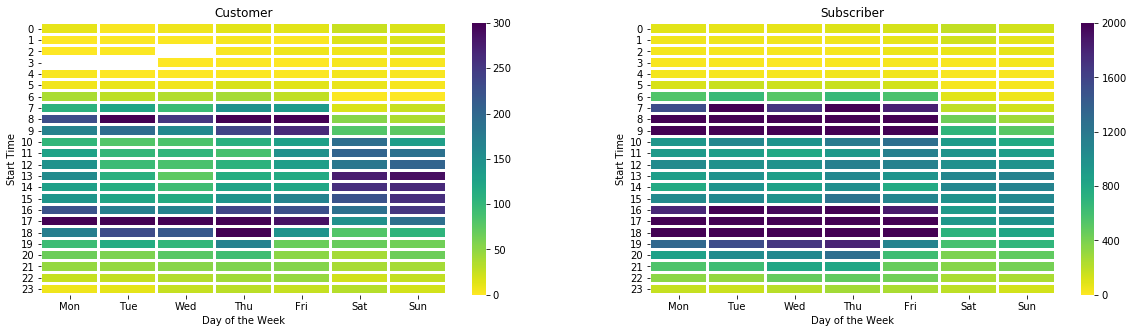

In [73]:
customer = master_df.query("user_type == 'Customer'").groupby(['start_hour', 'start_day'])['bike_id'].size().reset_index();
customer = customer.pivot('start_hour', 'start_day', 'bike_id')

plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
sb.heatmap(customer, cmap="viridis_r",linewidths=2, vmax=300, vmin=0)
plt.title('Customer')
plt.xlabel('Day of the Week')
plt.ylabel('Start Time');

subscriber = master_df.query("user_type == 'Subscriber'").groupby(['start_hour', 'start_day'])['bike_id'].size().reset_index();
subscriber = subscriber.pivot('start_hour', 'start_day', 'bike_id')

plt.subplot(1, 2, 2)
sb.heatmap(subscriber, cmap="viridis_r",linewidths=2, vmax=2000, vmin=0)
plt.title('Subscriber')
plt.xlabel('Day of the Week')
plt.ylabel('Start Time');

#### Observations:
- Customers mostly use the bikes on weekends whereas subscribers mostly use them on weekdays to commute to and from work.
- On weekdays, most bike rides occur between 8-9am and 5-6pm
- On weekends, most bike rides occur between 1-2pm

#### Question 3: Daily Usage per Gender and User Type

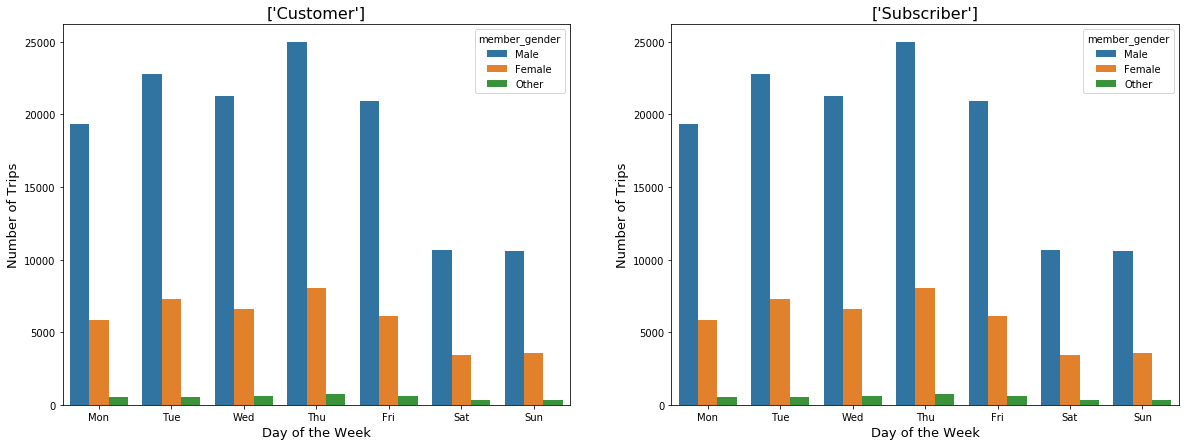

In [74]:
cust = master_df.query("user_type == 'Customer'")
sub = master_df.query("user_type == 'Subscriber'")

#Function to plot countplots for multivariate exploration
def countMulti(a, b, c):
    sb.countplot(data=a, x=master_df[b], hue=master_df[c])
    plt.title('{y}'.format(y=a.user_type.unique()), fontsize=16)
    plt.xlabel('Day of the Week', fontsize=13)
    plt.ylabel('Number of Trips', fontsize=13)

    
plt.show()

plt.figure(figsize = (20, 7))
plt.subplot(1,2,1)
countMulti(cust, 'start_day', 'member_gender')

plt.subplot(1,2,2)
countMulti(sub, 'start_day', 'member_gender')

#### Observation:
- The trends for both genders(male and female) is similar for customers and subscribers. 
- The peak for both Customers and Subscribers, as well as both genders is Thursday

#### Question 4: Time Taken per User Type and Gender

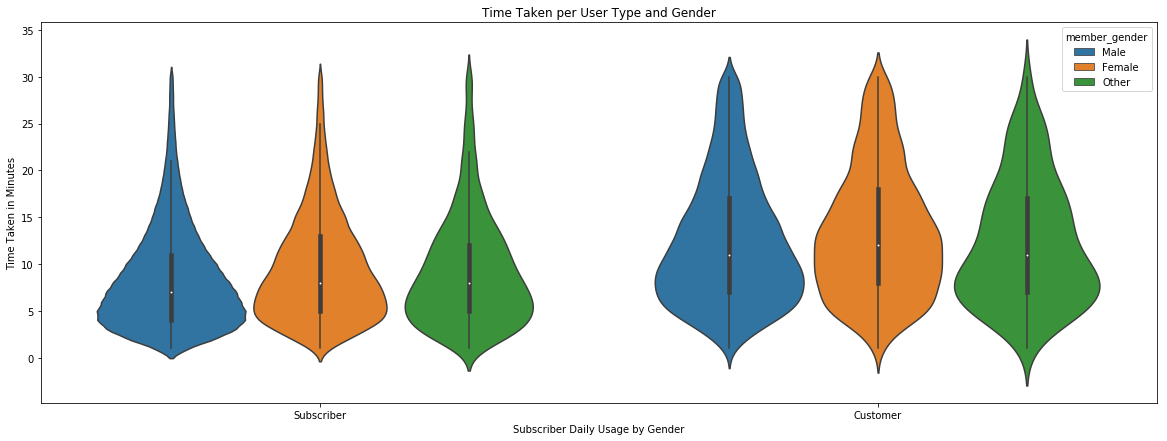

In [75]:
plt.figure(figsize = (20, 7))
sb.violinplot(data=user_time, x='user_type', y='duration_min', hue='member_gender')
plt.xlabel('Subscriber Daily Usage by Gender')
plt.ylabel('Time Taken in Minutes')
plt.title('Time Taken per User Type and Gender');

#### Observation:
- Both Subscriber and Customer Females take a longer time during each bike trip.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I added a column age_group that grouped the ages of the users of the bike share system. This helped to demonstrate the habits of different age groups.

### Were there any interesting or surprising interactions between features?

>There were no surprising interactions between features. 

## Conclusions
> Before I began exploration, I performed data wrangling on this dataset. After assessing and identifying the issues, I cleaned the dataset for easier exploration.
Below are the conclusions to my exploration:
1. Thursday has the highest number of trips for all users.
2. Subscribers are the majority users of Ford GoBike.
3. There are significantly more male users than female users.
4. Users of the age group 28 - 37 are the most frequent users.
5. Customers mainly use the bike share system on the weekends.
6. Subscribers mainly use the bike share system on weekdays.
7. Subscribers mainly use the bike share system when commuting to and from their workplaces.
8. Customers cover a longer distance than Subscribers.
9. Female users cover a slightly longer distance than male users.